In [1]:
import numpy 
import matplotlib.pyplot as plt
import copy
import time

In [2]:
"""
1(a). State formation
"""
def form_state(W,L,rotation):
    S = [] 
    for i in range(W):
        for j in range(L):
            for k in range(rotation):
                S.append(i * W + j + k / 100)
    return S

#number of W and L and rotation
#can be revised accordingly
W = 6
L = 6
rotation = 12
S = form_state(W,L,rotation)
print("The size of the state is W*L*rotation = ",len(S))


"""
1(b). Action formation
"""
movingset = ["forward","backward","stay"]
rotationset = ["left","right","stay"]
A = []
for i in movingset:
    if i == "stay":
        A.append((i,"NA"))
    else:
        for j in rotationset:
            A.append((i,j))
print("The size of the action is: ",len(A))

The size of the state is W*L*rotation =  432
The size of the action is:  7


In [3]:
"""
1(c). The function returns the probability psa(s')
"""
def probability_of_state(pe,s,action,ss):
    
    #transform the state information to the coordinates and direction indices
    cd = int(100 * round(s - int(s),2))
    cp = (int(s) % W,int((int(s) - int(s) % W) / W))
    nd = int(100 * round(ss - int(ss),2))
    np = (int(ss) % W,int((int(ss) - int(ss) % W) / W))
                            
    """
    Do the math
    """        
    #next state is not the neighbour of current state 
    if numpy.linalg.norm([np[0]-cp[0],np[1]-cp[1]]) > 1:
        return 0
    
    #current state and next state has the same position 
    elif numpy.linalg.norm([np[0]-cp[0],np[1]-cp[1]]) == 0:
        
        #situation 1: action is to ask stay
        if action[0] == "stay":
            return 1
        #situation 2: the directions are also the same
        elif cd == nd:
            #subsituation 1: the action asks to move and stay
            if action[1] == "stay":
                return 1-2*pe
            #subsituation 2: there is pre-rotation
            else:
                return pe
        #situation 3: there is change of 1 in direction    
        elif abs(cd - nd) == 1 or abs(cd - nd) == 11:
            return 1-2*pe
        #situation 4: pre-rotation
        elif (cd - nd == -2 or cd - nd == 10) and action[1] == "right":
            return pe
        elif (cd - nd == 2 or cd - nd == -10) and action[1] == "left":
            return pe
        #next state direction cannot turned into given the current state direction
        else:
            return 0
    
    #current state and next state has the difference of 1 in x or y (not the same time)
    else:
        
        #situation 1: the directions are also the same
        if cd == nd:
            #subsituation 1: the action asks to move and stay
            if action[1] == "stay":
                return 1-2*pe
            #subsituation 2: there is pre-rotation
            else:
                return pe
        #situation 2: there is change of 1 in direction    
        elif abs(cd - nd) == 1 or abs(cd - nd) == 11:
            return 1-2*pe
        #situation 3: pre-rotation
        elif (cd - nd == -2 or cd - nd == 10) and action[1] == "right":
            return pe
        elif (cd - nd == 2 or cd - nd == -10) and action[1] == "left":
            return pe
        #situation 4: no chance
        else:
            return 0

In [4]:
"""
1(d) Function to return a next state s'
"""
def find_next_state(pe,s,action,flag=1):
    #transform the state information to the coordinates and direction indices
    cd = int(100 * round(s - int(s),2))
    cp = (int(s) % W,int((int(s) - int(s) % W) / W))
    prob = []
    nxp = []

    """#with pe probability of pre-rotate to right""" 
    prob.append(pe)
    nd = (cd + 1) % 12
    #if action is asked to forward
    if action[0] == "forward":
        #find possible next positions
        if nd in [11,0,1]:
            if cp[1] == 5:
                np = cp
            else:
                np = (cp[0],cp[1]+1)
        elif nd in [2,3,4]:
            if cp[0] == 5:
                np = cp
            else:
                np = (cp[0] + 1,cp[1])
        elif nd in [5,6,7]:        
            if cp[1] == 0:
                np = cp
            else:
                np = (cp[0],cp[1]-1)
        else:
            if cp[0] == 0:
                np = cp
            else:
                np = (cp[0]-1,cp[1])
        #find possible next direction
        if action[1] == "stay":
            nd = nd
        elif action[1] == "left":
            nd = (nd - 1) % 12
        else:
            nd = (nd + 1) % 12
    #if action is asked to backward        
    else:       
        if nd in [11,0,1]:
            if cp[1] == 0:
                np = cp
            else:
                np = (cp[0],cp[1]-1)
        elif nd in [2,3,4]:
            if cp[0] == 0:
                np = cp
            else:
                np = (cp[0]-1,cp[1])
        elif nd in [5,6,7]:        
            if cp[1] == 5:
                np = cp
            else:
                np = (cp[0],cp[1]+1)
        else:
            if cp[0] == 5:
                np = cp
            else:
                np = (cp[0]+1,cp[1])

        if action[1] == "stay":
            nd = nd
        elif action[1] == "left":
            nd = (nd - 1) % 12
        else:
            nd = (nd + 1) % 12
    nxp.append(np[1]*6 + np[0] + nd/100)

    """with pe probability of pre-rotate to left """
    prob.append(pe)
    nd = (cd - 1) % 12
    #if action is asked to forward
    if action[0] == "forward":
        #find possible next positions
        if nd in [11,0,1]:
            if cp[1] == 5:
                np = cp
            else:
                np = (cp[0],cp[1]+1)
        elif nd in [2,3,4]:
            if cp[0] == 5:
                np = cp
            else:
                np = (cp[0] + 1,cp[1])
        elif nd in [5,6,7]:        
            if cp[1] == 0:
                np = cp
            else:
                np = (cp[0],cp[1]-1)
        else:
            if cp[0] == 0:
                np = cp
            else:
                np = (cp[0]-1,cp[1])
        #find possible next direction
        if action[1] == "stay":
            nd = nd
        elif action[1] == "left":
            nd = (nd - 1) % 12
        else:
            nd = (nd + 1) % 12
    #if action is asked to backward        
    else:       
        if nd in [11,0,1]:
            if cp[1] == 0:
                np = cp
            else:
                np = (cp[0],cp[1]-1)
        elif nd in [2,3,4]:
            if cp[0] == 0:
                np = cp
            else:
                np = (cp[0]-1,cp[1])
        elif nd in [5,6,7]:        
            if cp[1] == 5:
                np = cp
            else:
                np = (cp[0],cp[1]+1)
        else:
            if cp[0] == 5:
                np = cp
            else:
                np = (cp[0]+1,cp[1])

        if action[1] == "stay":
            nd = nd
        elif action[1] == "left":
            nd = (nd - 1) % 12
        else:
            nd = (nd + 1) % 12
    nxp.append(np[1]*6 + np[0] + nd/100)

    """with 1-2*pe probability of not wrong"""
    prob.append(1-2*pe)
    nd = cd
    #if action is asked to stay
    if action[0] == "stay":
        np = cp
        nd = cd
    #if action is asked to forward    
    elif action[0] == "forward":
        #find possible next positions
        if nd in [11,0,1]:
            if cp[1] == 5:
                np = cp
            else:
                np = (cp[0],cp[1]+1)
        elif nd in [2,3,4]:
            if cp[0] == 5:
                np = cp
            else:
                np = (cp[0] + 1,cp[1])
        elif nd in [5,6,7]:        
            if cp[1] == 0:
                np = cp
            else:
                np = (cp[0],cp[1]-1)
        else:
            if cp[0] == 0:
                np = cp
            else:
                np = (cp[0]-1,cp[1])
        #find possible next direction
        if action[1] == "stay":
            nd = nd
        elif action[1] == "left":
            nd = (nd - 1) % 12
        else:
            nd = (nd + 1) % 12
    #if action is asked to backward        
    else:       
        if nd in [11,0,1]:
            if cp[1] == 0:
                np = cp
            else:
                np = (cp[0],cp[1]-1)
        elif nd in [2,3,4]:
            if cp[0] == 0:
                np = cp
            else:
                np = (cp[0]-1,cp[1])
        elif nd in [5,6,7]:        
            if cp[1] == 5:
                np = cp
            else:
                np = (cp[0],cp[1]+1)
        else:
            if cp[0] == 5:
                np = cp
            else:
                np = (cp[0]+1,cp[1])

        if action[1] == "stay":
            nd = nd
        elif action[1] == "left":
            nd = (nd - 1) % 12
        else:
            nd = (nd + 1) % 12
    nxp.append(np[1]*6 + np[0] + nd/100)
    
    #asked to return one possible next state
    if flag == 0:
        return numpy.random.choice(nxp,1,p=prob)
    #return all possible next states and corresponding probability
    else:
        return nxp,prob

In [5]:
"""
2 Rewards
"""
def reward(s):
    #transform the state information to the coordinates and direction indices
    cd = int(100 * round(s - int(s),2))
    cp = (int(s) % W,int((int(s) - int(s) % W) / W))
    if cp[0] in [0,5] or cp[1] in [0,5]:
        return -100
    elif cp in [(2,4),(2,3),(2,2),(4,2),(4,3),(4,4)]:
        return -10
    elif cp == (3,4):
        return 1
    else:
        return 0

In [6]:
"""
3(a) Initial Policy
"""
initial_policy = []
for k in range(6):
    temp2 = []
    for i in range(6):
        temp = []
        for j in range(12):
            temp.append(("forward","right"))
        temp2.append(temp)    
    initial_policy.append(temp2)

In [7]:
"""
3(b)
"""
def find_trajectory(policy,s,pe):
    #transform the state information to the coordinates and direction indices
    cp = (int(s) % W,int((int(s) - int(s) % W) / W))
    cd = int(100 * round(s - int(s),2))

    ss = find_next_state(pe,s,policy[cp[0]][cp[1]][cd],flag=0)[0]
    np = (int(ss) % W,int((int(ss) - int(ss) % W) / W))
    nd = int(100 * round(ss - int(ss),2))
    plt.plot([cp[0],np[0]],[cp[1],np[1]],"ro-")
#     print(cp,cd,np,nd)
    for num in range(50):
        sss = ss
        np1 = (int(sss) % W,int((int(sss) - int(sss) % W) / W))
        nd1 = int(100 * round(sss - int(sss),2))

        ss = find_next_state(pe,sss,policy[np1[0]][np1[1]][cd],flag=0)[0]
        np2 = (int(ss) % W,int((int(ss) - int(ss) % W) / W))
        nd2 = int(100 * round(ss - int(ss),2))
        plt.plot([np1[0],np2[0]],[np1[1],np2[1]],"ro-")
#         print(np1,nd1,np2,nd2)
    plt.xlim((0,5))
    plt.ylim((0,5))
    plt.show()
    plt.gcf().clear()

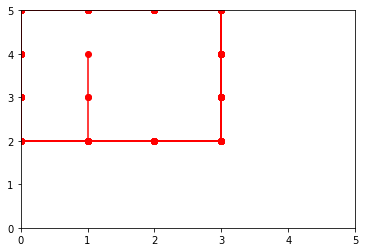

In [8]:
"""
3(c)
for state x=1, y=4, h=6, my s=21.06
"""
find_trajectory(initial_policy,25.06,0)

In [9]:
"""
3(d)
"""
def policy_evaluation(policy,lamda,pe):
    #initialization V
    V = numpy.zeros((6,6,12))
    V_copy = numpy.zeros((6,6,12))
    flag = 0.001
    diff = 10
    # loop until converge
    while(diff>flag):
        #store last state value for later use
        V = copy.deepcopy(V_copy)
        #run for every state
        for j in range(6):
            for i in range(6):
                for k in range(12):
                    s = i + j * 6 + k/100
                    a = policy[i][j][k]
                    #possible next states and corresponding probability
                    nxt,prob = find_next_state(pe,s,a)
                    VV = 0
#                     print(s)
                    for n in range(len(nxt)):
#                         print(nxt[n],prob[n],reward(nxt[n]))
                        np = (int(nxt[n]) % W,int((int(nxt[n]) - int(nxt[n]) % W) / W))
                        nd = int(100 * round(nxt[n] - int(nxt[n]),2))
                        VV += prob[n] *(reward(nxt[n]) + lamda*V[np[0],np[1],nd])
                    #update state value    
#                     print("\n")
                    V_copy[i,j,k] = VV
        #find the max difference between new state values and last state values            
        diff = numpy.amax(abs(V - V_copy))
    return V

In [10]:
"""
3(e)
"""
policy_evaluation(initial_policy,0.9,0)

array([[[-601.04071376, -614.22190418, -842.35777422, -824.84197135,
         -805.37996817, -783.75552019, -759.72938481, -733.03367883,
         -703.3717833 , -670.4141216 , -633.79449749, -593.10602625],
        [-547.89661376, -556.71190418, -571.35777422, -634.84197135,
         -705.37996817, -783.75552019, -759.72938481, -733.03367883,
         -584.25851734, -538.06604831, -486.74108272, -429.71334318],
        [-366.34918813, -497.66290418, -507.45777422, -562.84197135,
         -615.37996817, -783.75552019, -759.72938481, -625.83266561,
         -782.29239207, -758.1036869 , -731.22734782, -701.36474885],
        [-668.18408332, -295.94354236, -441.84777422, -498.04197135,
         -534.37996817, -783.75552019, -663.24939904, -804.06315287,
         -782.29239207, -758.1036869 , -731.22734782, -701.36474885],
        [-668.18408332, -631.31667717, -217.71514997, -310.3398119 ,
         -383.33201323, -696.92445914, -823.65674497, -804.06315287,
         -782.29239207, -758.1

In [11]:
"""
3(f)
"""
def return_policy(V,A,lamda,pe):
    #setup an empty policy
    policy = []
    for k in range(6):
        temp2 = []
        for i in range(6):
            temp = []
            for j in range(12):
                temp.append(("-","-"))
            temp2.append(temp)    
        policy.append(temp2)
        
    #find policy for all state
    for j in range(6):
        for i in range(6):
            for k in range(12):
                s = i + j * 6 + k/100
                temp = []
                for a in A:
                    nxt,prob = find_next_state(pe,s,a)
                    VV = 0
                    for n in range(len(nxt)):
                        np = (int(nxt[n]) % W,int((int(nxt[n]) - int(nxt[n]) % W) / W))
                        nd = int(100 * round(nxt[n] - int(nxt[n]),2))
                        VV += prob[n] *(reward(nxt[n]) + lamda*V[np[0],np[1],nd])
                    temp.append(VV)
                policy[i][j][k] = A[temp.index(max(temp))]
    return policy

In [12]:
"""
3(g) Combine functions
"""
def policy_iteration(initial_policy,A,lamda,pe):
    ipolicy = initial_policy.copy()
    while True:
        V = policy_evaluation(ipolicy,lamda,pe)
        npolicy = return_policy(V,A,lamda,pe)
        if npolicy == ipolicy:
            break
        else:
            ipolicy = npolicy.copy()
    return npolicy,V    

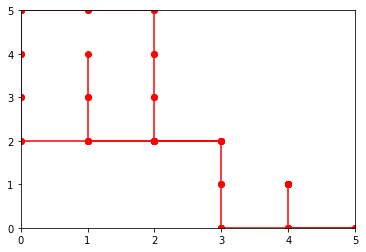

In [13]:
"""
3(h) find trajectory
"""
t1 = time.clock()
p,V = policy_iteration(initial_policy,A,0.9,0)
find_trajectory(p,25.06,0)
t2 = time.clock()

In [14]:
"""
3(i)
"""
print("The time policy iteration takes to run 3(h) is:",round(t2-t1,3),"sec. (Round to 3 decimal points)")

The time policy iteration takes to run 3(h) is: 6.195 sec. (Round to 3 decimal points)


In [15]:
"""
4(a)
"""
def value_iter(A,lamda,pe):
    #initialize state value
    V = numpy.zeros((6,6,12))
    V_temp = numpy.zeros((6,6,12))
    #initialize policy
    policy = [[[("-","-") for i in range(12)] for j in range(6)] for k in range(6)]
    while True:
        for j in range(6):
            for i in range(6):
                for k in range(12):
                    s = i + j*6 + k/100
                    temp = []
                    for a in A:
                        VV = 0
                        nxt,prob = find_next_state(pe,s,a)
                        for n in range(len(nxt)):
                            np = (int(nxt[n]) % W,int((int(nxt[n]) - int(nxt[n]) % W) / W))
                            nd = int(100 * round(nxt[n] - int(nxt[n]),2))
                            VV += prob[n] *(reward(nxt[n]) + lamda*V[np[0],np[1],nd])
                        temp.append(VV)
                    V[i,j,k] = max(temp)
                    policy[i][j][k] = A[temp.index(max(temp))]
#                     print(temp)
#                     print(max(temp))
#                     print(A[temp.index(max(temp))])
                        
        diff = numpy.amax(abs(V - V_temp))
        if diff < 0.001:
            break
        else:
            V_temp = copy.deepcopy(V)
    return policy,V        

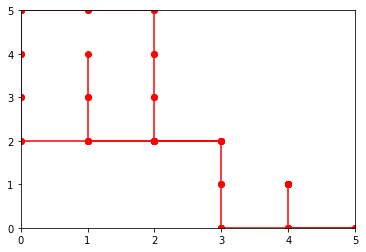

In [16]:
"""
4(b) find trajectory
"""
t1 = time.clock()
p,V = value_iter(A,0.9,0)
find_trajectory(p,25.06,0)
t2 = time.clock()

In [17]:
"""
4(c)
"""
print("The time value iteration takes to run 4(b) is:",round(t2-t1,3),"sec. (Round to 3 decimal points)")

The time value iteration takes to run 4(b) is: 4.427 sec. (Round to 3 decimal points)


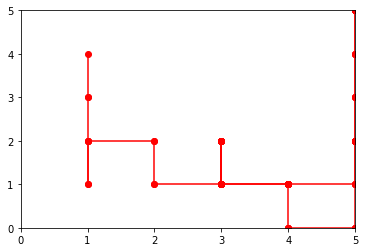

The time value iteration takes to run 5(a) is: 3.158 sec. (Round to 3 decimal points)


In [18]:
"""
5(a) value iteration
"""
t1 = time.clock()
p,V = value_iter(A,0.9,0.25)
find_trajectory(p,25.06,0.25)
t2 = time.clock()
print("The time value iteration takes to run 5(a) is:",round(t2-t1,3),"sec. (Round to 3 decimal points)")

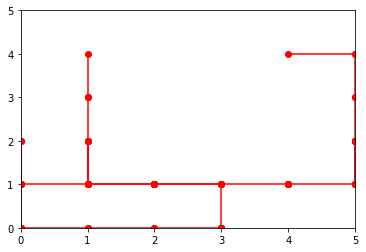

The time policy iteration takes to run 5(a) is: 5.832 sec. (Round to 3 decimal points)


In [19]:
t1 = time.clock()
p,V = policy_iteration(initial_policy,A,0.9,0.25)
find_trajectory(p,25.06,0.25)
t2 = time.clock()
print("The time policy iteration takes to run 5(a) is:",round(t2-t1,3),"sec. (Round to 3 decimal points)")

In [20]:
"""
5(b) new reward
"""
def reward(s):
    #transform the state information to the coordinates and direction indices
    cd = int(100 * round(s - int(s),2))
    cp = (int(s) % W,int((int(s) - int(s) % W) / W))
    if cp[0] in [0,5] or cp[1] in [0,5]:
        return -100
    elif cp in [(2,4),(2,3),(2,2),(4,2),(4,3),(4,4)]:
        return -10
    elif cp == (3,4) and cd in [5,6,7]:
        return 1
    else:
        return 0

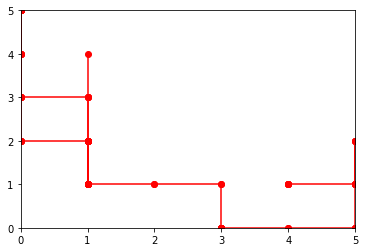

The time policy iteration takes to run 5(a) is: 5.736 sec. (Round to 3 decimal points)


In [21]:
t1 = time.clock()
p,V = policy_iteration(initial_policy,A,0.9,0.25)
find_trajectory(p,25.06,0.25)
t2 = time.clock()
print("The time policy iteration takes to run 5(a) is:",round(t2-t1,3),"sec. (Round to 3 decimal points)")

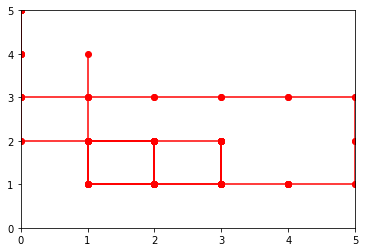

The time value iteration takes to run 5(a) is: 3.149 sec. (Round to 3 decimal points)


In [22]:
t1 = time.clock()
p,V = value_iter(A,0.9,0.25)
find_trajectory(p,25.06,0.25)
t2 = time.clock()
print("The time value iteration takes to run 5(a) is:",round(t2-t1,3),"sec. (Round to 3 decimal points)")